***SHEET 4***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [94]:
#IMPORTS
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
#import requests as rq
import itertools

### EXERCISE 1

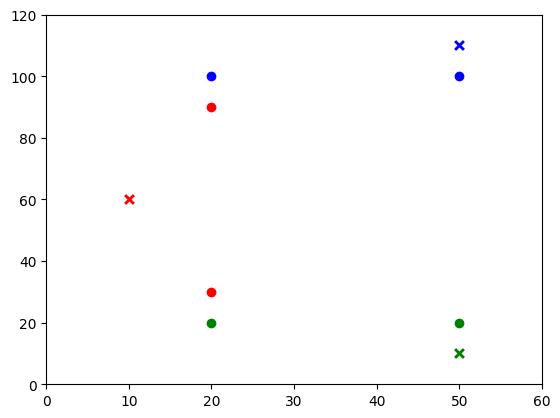

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


C:\Users\Carlos Abdala\AppData\Local\Temp\ipykernel_19976\1863836953.py:34: RuntimeWarning: Mean of empty slice
  cluster_mean = np.nanmean(cluster_array, axis=0)


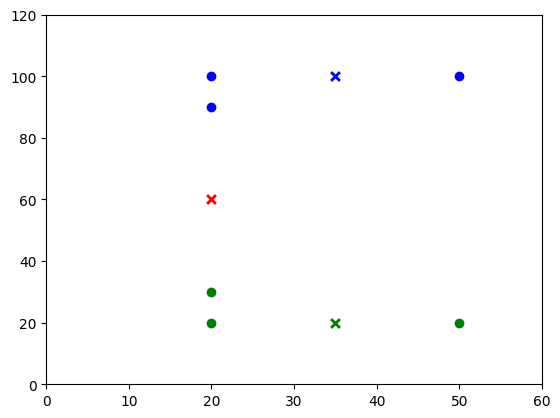

El Cluster ' red ' no tiene valores, por lo que su centroide no variara


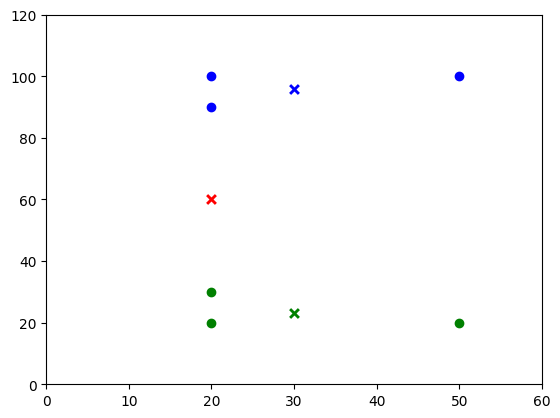

In [95]:
D_simulated=np.array([[20,20],
                     [50,20],
                     [20,30],
                     [20,90],
                     [20,100],
                     [50,100]])
mu_simulated=np.array([[10,60],
                      [50,10],
                      [50,110]])

e_calculated=0.02+1
mu_previows= [[0,0]for _ in range(len(mu_simulated))]
colors=["red","green", "blue"]

while(e_calculated>0.02):
    final_C=[]
    e_guide=0
    clusters = [[]for _ in range(len(mu_simulated))]
    plt.xlim(0, 60)
    plt.ylim(0, 120)
    plt.plot()
    for _, point in enumerate(D_simulated): 
        difference_in_point=[]

        for index, centroid in enumerate(mu_simulated):
            plt.scatter(centroid[0],centroid[1],color=colors[index],marker='x')
            difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
        nearest_index=np.argmin(difference_in_point)
        clusters[nearest_index].append(point)
        final_C.append(nearest_index)

    for index, cluster in enumerate(clusters):
        cluster_array = np.array(cluster)
        cluster_mean = np.nanmean(cluster_array, axis=0)
        if (not np.isnan(cluster_mean).any()):
            mu_simulated[index] = cluster_mean
            for _, point in enumerate(cluster):
                plt.scatter(point[0], point[1], color=colors[index])
        else:
            print("El Cluster '",colors[index],"' no tiene valores, por lo que su centroide no variara")

    for index, centroid_group_calculated in enumerate(mu_simulated):
        e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
        e_calculated=e_guide
    mu_previows=mu_simulated.copy()
    plt.show()



En este sencillo ejemplo se puede ver como haciendo uso de K-means, la actualización de cada Cluster y su centroide generó que en el caso de el grupo de datos rojo, pasara de tener dos datos a no tener ninguno ya que desde la segunda iteración, los puntos que inicialmente pertenecian a este Cluster, pasaron a pertenecer a otros, en este caso los amarillo y verde.

### EXERCISE 2

#### EXERCISE 2.1

In [96]:
def kMeans(D,k,e,mu_given):
    t=0
    if mu_given==None:
        mu=[]
        min_Di = min(D[:, 0])
        max_Di = max(D[:, 0])
        min_Dj = min(D[:, 1])
        max_Dj = max(D[:, 1])
        for _ in range(k):
            centroid_i=random.uniform(min_Di,max_Di)
            centroid_j=random.uniform(min_Dj,max_Dj)
            mu.append([centroid_i,centroid_j])
    elif (len(mu_given)!=k):
        #print("El número de centroides dado no coincide con las k's requeridas")
        return (None)
    else:
        mu=mu_given
    
    e_calculated=e+1
    mu_previows= [[0,0]for _ in range(len(mu))]

    while(e_calculated>e):
        final_C=[]
        e_guide=0
        t+=1
        clusters = [[]for _ in range(len(mu))]
        for _, point in enumerate(D): 
            difference_in_point=[]

            for _, centroid in enumerate(mu):
                difference_in_point.append(math.sqrt(np.linalg.norm(point - centroid)))
            nearest_index=np.argmin(difference_in_point)
            clusters[nearest_index].append(point)
            final_C.append(nearest_index)

        for index, cluster in enumerate(clusters):
            cluster_array=np.array(cluster)
            cluster_mean=np.mean(cluster_array,axis=0)
            mu[index]=cluster_mean

        for index, centroid_group_calculated in enumerate(mu):
            e_guide=e_guide+math.sqrt(np.linalg.norm(centroid_group_calculated - mu_previows[index]))
            e_calculated=e_guide
        mu_previows=mu.copy()

        nan_present = any(np.isnan(centroid_for_nan).any() for centroid_for_nan in mu)

        if(nan_present):
            if(mu_given!=None):
                print("Los centroides 'mu' dados generan valores inválidos, por favor pruebe con otros valores")
            else:    
                final_C, mu =kMeans(D,k,e,mu_given)
        else:
            print("La lista de centroides tras la iteración ",t," es: \n", mu)
    
    return (final_C,mu)


In [97]:
D = np.random.randint(0, 10, size=(40, 2))

C,mu_x=kMeans(D,2,0.02,None)

La lista de centroides tras la iteración  1  es: 
 [array([1.55555556, 4.        ]), array([7.        , 5.27272727])]
La lista de centroides tras la iteración  2  es: 
 [array([1.55555556, 4.        ]), array([7.        , 5.27272727])]


#### EXERCISE 2.2

In [98]:
def DBSCAN (D, epsilon, minpts):
    
    def Density_Connected(x, k):
        for _,neighbor_index in enumerate(Ne(x, D, epsilon)):
            if id[neighbor_index] == 0:
                id[neighbor_index] = k
                if any((D[neighbor_index] == core_point).all() for core_point in core_points):
                    Density_Connected(D[neighbor_index], k)
    
    k = 0 # cluster id
    id  = np.array([-1]*len(D)) # cluster id
    core_points = []
    noise_points = []
    border_points = []

    for index, point in enumerate(D):
        neighborhood = Ne(point, D, epsilon)
        if len(neighborhood) >= minpts:
            id[index]=0
            core_points.append(point)
    index_in_list=0

    for index, point in enumerate(D):
        if id[index] == 0:
            k += 1
            id[index] = k
            Density_Connected(point, k)
        index_in_list+=1

    clusters = {i+1: {tuple(D[j]) for j in range(len(D)) if id[j] == i+1} for i in range(k)} 
    noise_points = [tuple(D[j]) for j in range(len(D)) if id[j] == -1]
    border_points = {tuple(D[j]) for j in range(len(D)) if any((D[j] == core_point).all() for core_point in core_points) and any((D[j] == noise_point).all() for noise_point in noise_points)}  

    print("Number of Clusters: ", len(clusters))
    print("Clusters: ", clusters)
    print("Core Points: ", core_points)
    print("Noise Points: ", noise_points)
    print("Border Points: ", border_points)
    return clusters, core_points, noise_points, border_points


def Ne (xi, D, epsilon):
    ne = []
    for point_index, xj in enumerate(D):
        if (np.linalg.norm(xi-xj) <= epsilon):
            ne.append(point_index)
    return ne 

X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])

clusters, core_points, noise_points, border_points= DBSCAN(X, 3, 2)

Number of Clusters:  2
Clusters:  {1: {(2, 3), (1, 2), (2, 2)}, 2: {(8, 7), (8, 8)}}
Core Points:  [array([1, 2]), array([2, 2]), array([2, 3]), array([8, 7]), array([8, 8])]
Noise Points:  [(25, 80)]
Border Points:  set()


### EXERCISE 3

#### EXERCISE 3.1

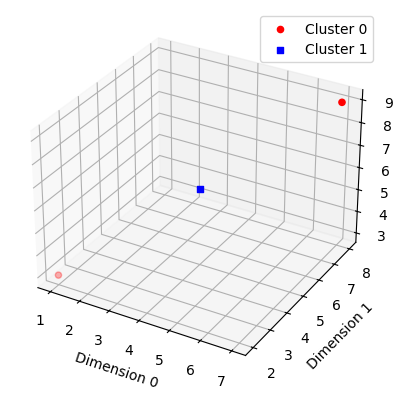

<Axes3D: xlabel='Dimension 0', ylabel='Dimension 1', zlabel='Dimension 2'>

In [99]:

def plotClusters(A, C, dimX, dimY, dimZ=None, ax=None):
    if ax is None:
        if dimZ is None:
            fig, ax = plt.subplots()
        else:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
    else:
        fig = ax.get_figure()

    clusters = set(C)
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
    markers = ['o', 's', 'v', '^', 'D', 'P', 'X', '*', '+', 'h']


    for cluster in clusters:
        indices = [i for i, c in enumerate(C) if c == cluster]
        cluster_points = A[indices]
        if dimZ is None:
            ax.scatter(cluster_points[:, dimX], cluster_points[:, dimY], color=colors[cluster % len(colors)], marker=markers[cluster % len(markers)], label=f'Cluster {cluster}')
        else:
            ax.scatter(cluster_points[:, dimX], cluster_points[:, dimY], cluster_points[:, dimZ], color=colors[cluster % len(colors)], marker=markers[cluster % len(markers)], label=f'Cluster {cluster}')

    if dimZ is None:
        ax.set_xlabel(f'Dimension {dimX}')
        ax.set_ylabel(f'Dimension {dimY}')
    else:
        ax.set_xlabel(f'Dimension {dimX}')
        ax.set_ylabel(f'Dimension {dimY}')
        ax.set_zlabel(f'Dimension {dimZ}')

    ax.legend()
    plt.show()

    return ax

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C = np.array([0, 1, 0])
dimX = 0
dimY = 1
dimZ = 2

plotClusters(A, C, dimX, dimY, dimZ)

#### EXERCISE 3.2

In [100]:
# Frame implementation 
iris_frame_dowloaded = pd.read_csv("iris.csv")
filtered_iris_frame = iris_frame_dowloaded.loc[:, iris_frame_dowloaded.columns != "species"]

In [101]:
def PCA (D,red):
    u= np.array([])
    mean_of_D= np.mean(D, axis=0)
    center_D= D-mean_of_D
    cov_D = np.cov(center_D, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_D)
    eigenvalues= abs(eigenvalues)
    order_indices = np.argsort(eigenvalues)[::-1].tolist()

    sorted_eigenvalues = eigenvalues[order_indices]
    sorted_eigenvectors = eigenvectors[:, order_indices]
    total_variance=(np.sum(eigenvalues))
 
    if(0<=red and red<1):
        red_acum_variance=(total_variance*red)
        acum_variance=0
        r=0
        for index in range(len(sorted_eigenvalues)):
            r+=1
            acum_variance+=sorted_eigenvalues[index]
            if acum_variance > red_acum_variance:
                break
        if r!=0:
            u= sorted_eigenvectors[:,:r]
            D_resized = np.dot(center_D, u)
        else:
            return ("El valor de alpha solicitado es inválido para la matriz",0)
       
    if(red>=1 and int == type(red)):
        acum_variance= sum(sorted_eigenvalues[:red])
        u= sorted_eigenvectors[:,:red]
        D_resized = np.dot(center_D, u)

    ralative_variance= acum_variance/total_variance
    return (D_resized,acum_variance,ralative_variance)

resized_iris_frame, acum_variance, ralative_variance= PCA(filtered_iris_frame, 2)

Resultados obtenidos en el Clustering 1 - ε= 0.44:
La lista de centroides tras la iteración  1  es: 
 [array([0.59198565, 0.26729833]), array([ 2.04201926, -0.10923689]), array([-2.33904417, -0.06043921])]
La lista de centroides tras la iteración  2  es: 
 [array([0.56754825, 0.35658302]), array([ 2.20422679, -0.21151055]), array([-2.64084076, -0.19051995])]
La lista de centroides tras la iteración  3  es: 
 [array([0.59687393, 0.35254287]), array([ 2.24129768, -0.23219098]), array([-2.64084076, -0.19051995])]

Resultados obtenidos en el Clustering 2 - ε= 0.21:
La lista de centroides tras la iteración  1  es: 
 [array([ 3.34379949, -0.75220296]), array([1.8490354 , 0.03585992]), array([-1.21286522,  0.03732218])]
La lista de centroides tras la iteración  2  es: 
 [array([ 3.12820371, -0.62644023]), array([1.40101452, 0.07579521]), array([-1.96885694,  0.0221968 ])]
La lista de centroides tras la iteración  3  es: 
 [array([ 2.85169836, -0.48965419]), array([1.08957013, 0.18118303]), ar

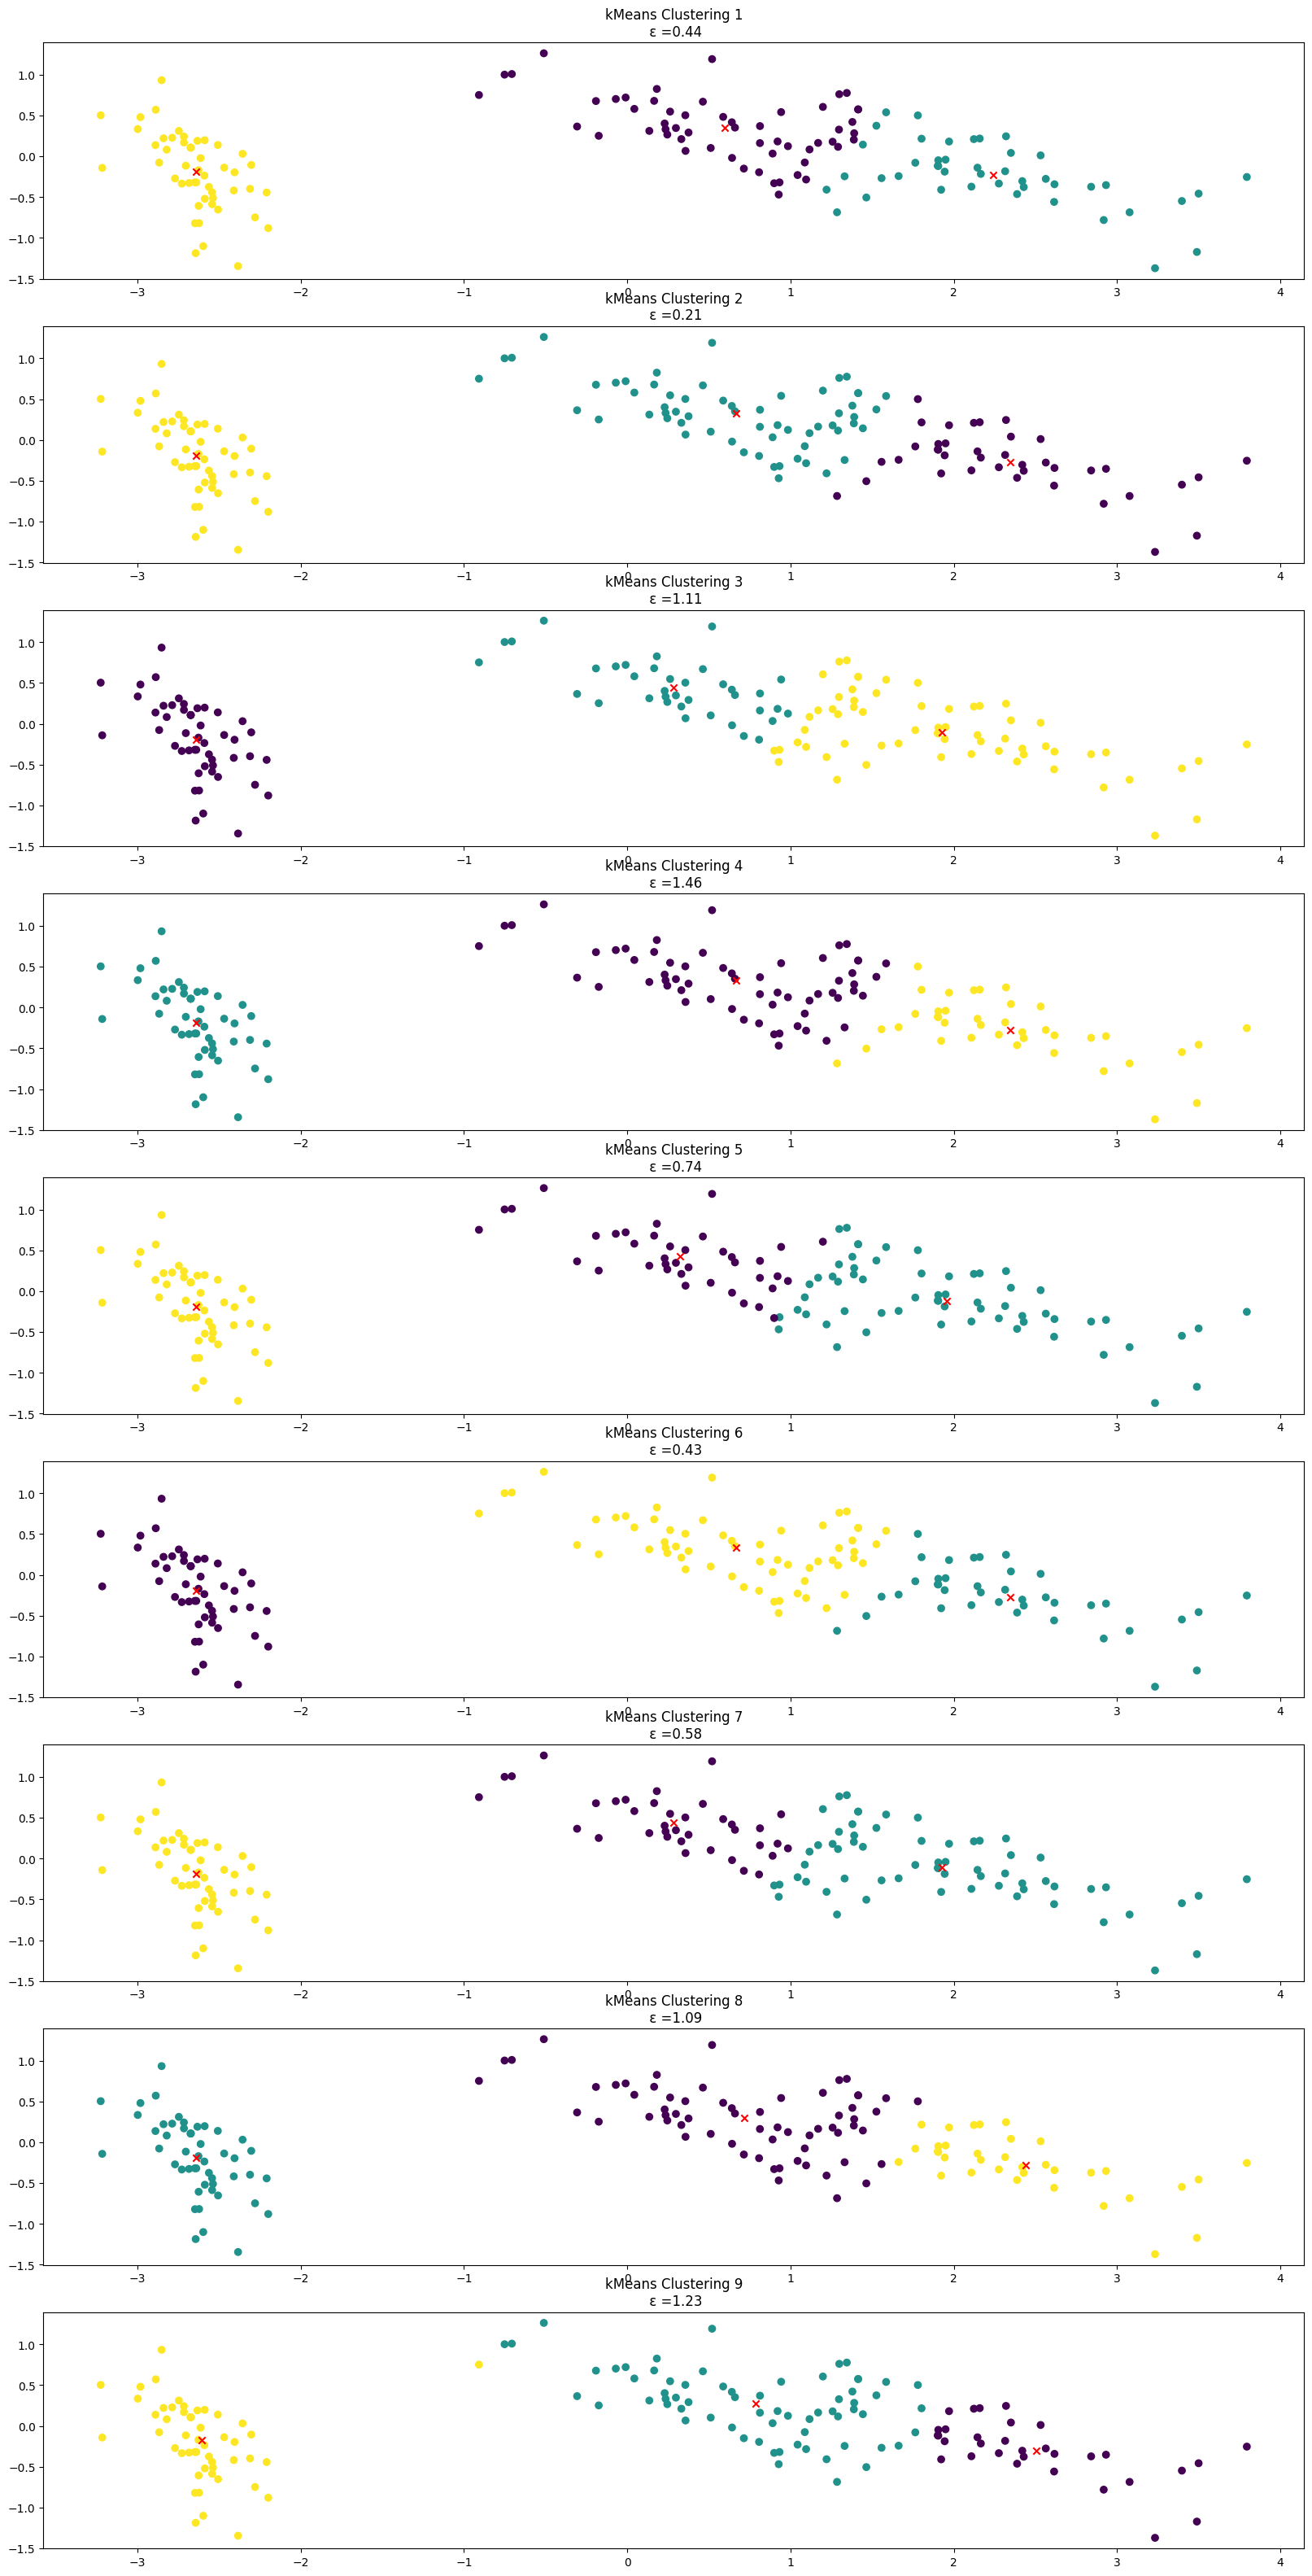

In [102]:
fig, axes = plt.subplots(9,1, figsize=(20, 40))

epsilon_values_kmeans=[]
for i in range(1,10):
    random_epsilon= round(random.uniform(0.2,1.5),2)
    epsilon_values_kmeans.append(random_epsilon)

#kmeans with iris frame 9 iterations whit k=3 and different epsilon
Kmeans_clusters = []
for i in range(1,10):
    if(i==1):
        print(f'Resultados obtenidos en el Clustering {i} - ε= {epsilon_values_kmeans[i-1]}:')
    else:
        print(f'\nResultados obtenidos en el Clustering {i} - ε= {epsilon_values_kmeans[i-1]}:')
    clusters, mu = kMeans(resized_iris_frame, 3, epsilon_values_kmeans[i-1], None)
    Kmeans_clusters.append(clusters)
    ax = axes[i - 1]
    ax.scatter(resized_iris_frame[:, 0], resized_iris_frame[:, 1], c=clusters)
    ax.scatter(np.array(mu)[:, 0], np.array(mu)[:, 1], marker='x', color='red')
    ax.set_title(f'kMeans Clustering {i}\n ε ={epsilon_values_kmeans[i-1]}')


Resultados obtenidos en el Clustering 0:
MinPoints:  2
Epsilon:  0.2
Number of Clusters:  16
Clusters:  {1: {(-2.7874339759970974, 0.22774018887110614), (-2.3105317013131326, -0.3978678215888921), (-2.587346188917737, -0.520473638805968), (-2.746437197308734, 0.31112431575199173), (-2.626481993323818, -0.17040534896028992), (-2.208832954176705, -0.44269603042100286), (-2.71539061563413, 0.16955684755602599), (-2.5903230255856733, -0.2360593372888729), (-2.639821268376581, -0.31929006596032194), (-2.8208906821806297, 0.08210451102468093), (-2.7156651907474543, 0.24268148289811284), (-2.6842071251039474, -0.3266073147643881), (-2.4100773371215953, -0.41808000824761626), (-2.840321296827008, 0.22057633827647663), (-2.8879585653356337, 0.5707980263315917), (-2.8898195396179154, 0.13734560960502765), (-2.981842664853908, 0.48025004885607653), (-2.62522846468042, -0.6068000084215864), (-2.7701389107463235, -0.2710594197651671), (-2.405514101284701, -0.19591725769606075), (-2.8669998469325337

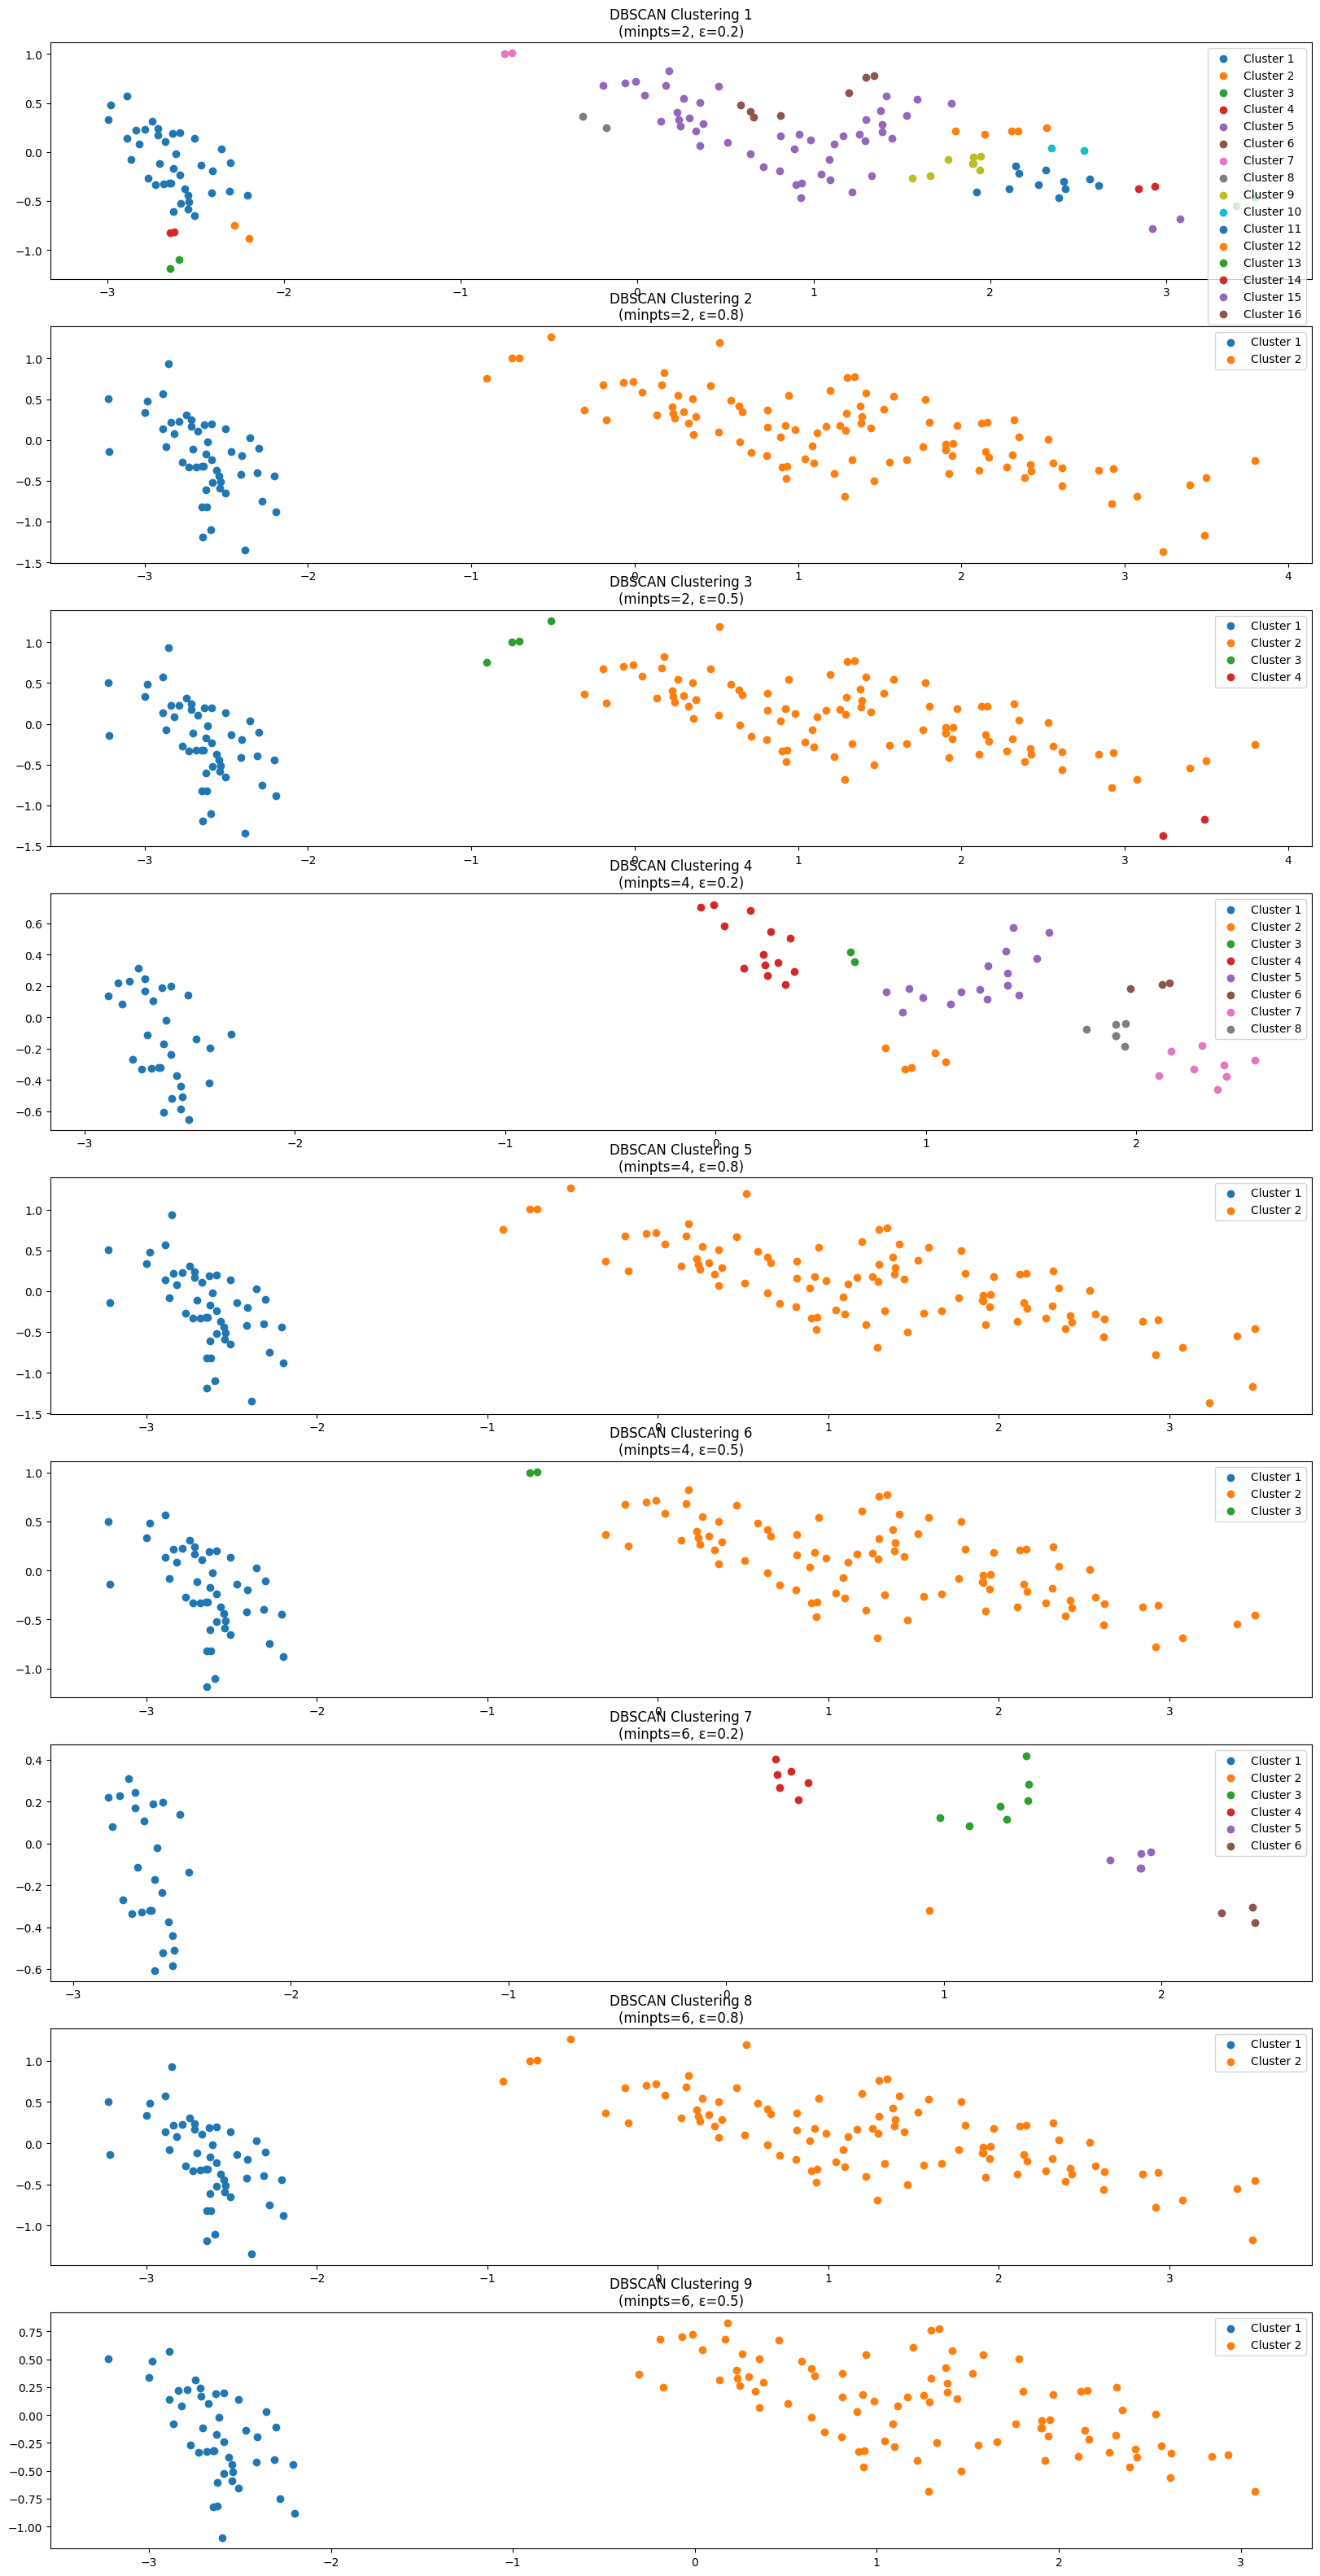

In [103]:
fig, axes = plt.subplots(9,1, figsize=(20, 40))

#DBSCAN with iris frame 9 iterations with minpts=5,10,8 and epsilon=2,3,4 combinations
minpts_values = [2,4,6]
epsilon_values = [0.2,0.8,0.5]
parameter_combinations = list(itertools.product(minpts_values, epsilon_values))

DBSCAN_clusters = []
for i,  (minpts, epsilon) in enumerate(parameter_combinations):
    if(i==0):
        print(f'Resultados obtenidos en el Clustering {i}:')
        print("MinPoints: ", minpts)
        print("Epsilon: ", epsilon)
    else:
        print(f'\nResultados obtenidos en el Clustering {i}:')
        print("MinPoints: ", minpts)
        print("Epsilon: ", epsilon)
    
    clusters, core_points, noise_points, border_points = DBSCAN(resized_iris_frame, epsilon, minpts)
    DBSCAN_clusters.append(clusters)
    ax = axes[i]
    for cluster in clusters:
        cluster_points = np.array(list(clusters[cluster]))
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
        ax.set_title(f'DBSCAN Clustering {i + 1}\n(minpts={minpts}, ε={epsilon})')
        ax.legend()